# Laboratorio: Clasificador K-Nearest Neighbors (KNN)
## Objetivos
Después de completar este laboratorio, podrás:

Usar K-Nearest Neighbors (KNN) para clasificar datos

Aplicar el clasificador KNN en un conjunto de datos del mundo real

En este laboratorio cargarás un conjunto de datos de clientes, ajustarás los datos y usarás K-Nearest Neighbors (KNN) para predecir un punto de datos.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

Imagina que un proveedor de telecomunicaciones ha segmentado su base de clientes según los patrones de uso del servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos pueden usarse para predecir la pertenencia a un grupo, la empresa puede personalizar ofertas para clientes potenciales individuales.

Este es un problema de clasificación. Es decir, dado un conjunto de datos con etiquetas predefinidas, necesitamos construir un modelo que pueda predecir la clase de un caso nuevo o desconocido.

El ejemplo se enfoca en usar datos demográficos —como región, edad y estado civil— para predecir patrones de uso.

El campo objetivo, llamado custcat, tiene cuatro posibles categorías de servicio que corresponden a los cuatro grupos de clientes, de la siguiente manera:

Basic Service

E-Service

Plus Service

Total Service

Nuestro objetivo es construir un clasificador que prediga la categoría de servicio para casos desconocidos. Usaremos un tipo específico de clasificación llamado K-Nearest Neighbors (KNN).

### Cragar los datos

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Visualización de datos y analisís</h2>
</div>


Primero revisemos la distribución del conjunto de datos por clase.

In [ ]:
df['custcat'].value_counts()

Por lo tanto, podemos decir que tenemos registros de 281 clientes que optan por Plus Services, 266 por Basic Services, 236 por Total Services y 217 por E-Services.
Así, se puede observar que el conjunto de datos está bastante equilibrado entre las diferentes clases y no requiere ningún método especial para corregir sesgos de clase.

También podemos visualizar el mapa de correlación del conjunto de datos para determinar cómo se relacionan entre sí las diferentes características.

<Axes: >

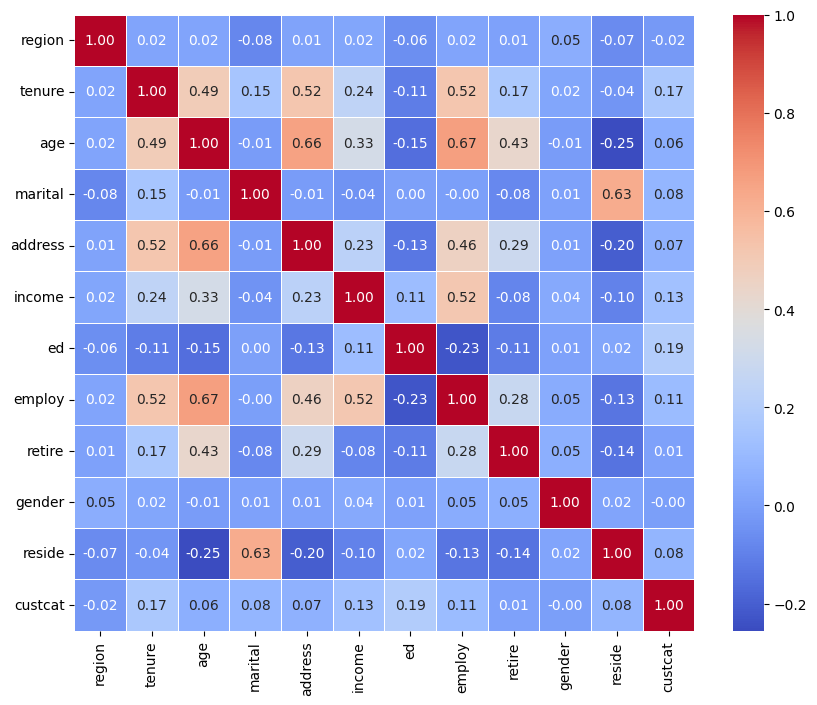

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Como se observa en el mapa de correlación, algunas características tienen mejor correlación entre sí que otras, lo que básicamente indica la intensidad de la relación entre dos características.
Lo que nos interesa es la correlación de la característica objetivo, es decir, custcat, con todas las demás características. Esto nos ayudará a identificar qué características deben considerarse para el modelado y cuáles pueden ignorarse.

El siguiente fragmento de código nos dará una lista de características ordenadas en forma descendente según sus valores absolutos de correlación con respecto al campo objetivo.

In [7]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values


ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

Esto nos muestra que las características retire y gender tienen el menor efecto sobre custcat, mientras que ed y tenure tienen el mayor efecto.

### Separar las características de entrada y la característica objetivo

Ahora podemos separar los datos en el conjunto de datos de entrada y el conjunto de datos objetivo.

In [8]:
X = df.drop('custcat',axis=1)
y = df['custcat']

## Normalizar los datos

La normalización de datos es importante para el modelo KNN.

KNN hace predicciones basándose en la distancia entre puntos de datos (muestras); es decir, para un punto de prueba, el algoritmo encuentra los k vecinos más cercanos midiendo la distancia entre ese punto y los demás puntos del conjunto de datos.
Al normalizar o estandarizar los datos, te aseguras de que todas las características contribuyan de manera equitativa al cálculo de la distancia. Dado que la normalización ajusta cada característica para que tenga media cero y varianza unitaria, coloca todas las características en la misma escala (evitando que una domine debido a un rango mayor).

Esto ayuda a que KNN tome mejores decisiones basadas en las relaciones reales entre las características, y no simplemente en la magnitud de sus valores.

In [10]:
X_norm = StandardScaler().fit_transform(X)

### División en entrenamiento y prueba

Ahora debes separar los datos de entrenamiento y prueba.
Puedes reservar el 20% de los datos para pruebas y usar el resto para entrenar.
Asignar un random_state garantiza la reproducibilidad de los resultados en múltiples ejecuciones.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

## KNN Classification

Una vez que los datos están listos, ahora podemos ejecutar el entrenamiento del modelo.

### Entrenamiento

Inicialmente, puedes comenzar usando un valor pequeño para k, por ejemplo k = 4.

In [12]:
k = 3
#Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

### Predicción

Una vez que el modelo está entrenado, podemos usarlo para generar predicciones sobre el conjunto de prueba.

In [13]:
yhat = knn_model.predict(X_test)

### Evaluación de exactitud

En clasificación multietiqueta, la puntuación de exactitud (accuracy classification score) es una función que calcula la exactitud por subconjuntos.
Esta función es equivalente a jaccard_score.
Básicamente, calcula qué tanto coinciden las etiquetas reales con las etiquetas predichas en el conjunto de prueba.

In [14]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


Ejercicio 1

¿Puedes construir el modelo nuevamente, pero esta vez usando k = 6?

In [15]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


### Elegir el valor correcto de k

En KNN, k es el número de vecinos más cercanos que se examinan. Sin embargo, la elección del valor de k afecta claramente el modelo. Por lo tanto, seleccionar apropiadamente el valor de este parámetro se convierte en una tarea importante.

La manera general de hacerlo es entrenar el modelo con diferentes valores de k y observar el rendimiento del modelo entrenado en el conjunto de prueba.
El modelo con el mejor valor de accuracy_score es el que tiene el valor ideal para el parámetro k.

Debes evaluar el rendimiento del modelo para 10 valores de k, desde 1 hasta 9.
Puedes evaluar la exactitud (accuracy) junto con la desviación estándar de la exactitud, para obtener una visión más completa del rendimiento del modelo.

In [16]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

### Graficar la exactitud del modelo para diferentes números de vecinos

Ahora puedes graficar la exactitud del modelo y la desviación estándar para identificar el modelo con el valor de k más adecuado.

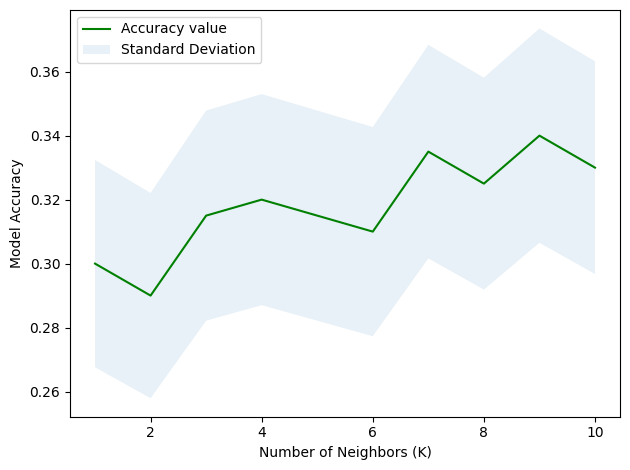

In [17]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.34 with k = 9


Sin embargo, dado que esta gráfica todavía va en aumento, existe la posibilidad de que el modelo tenga un mejor rendimiento con un valor de k aún mayor.

### Ejercicio 2

Ejecuta el entrenamiento del modelo para 30 valores de k y luego nuevamente para 100 valores de k.
Identifica el valor de k que mejor se ajusta a estos datos y la exactitud (accuracy) en el conjunto de prueba para dicho modelo.

Ejecuta las celdas anteriores cambiando el valor de la variable Ks a 30 y luego vuelve a intentarlo cambiándolo a 100.
En el caso de 30 valores, deberías encontrar que el mejor valor de accuracy se obtiene con k = 30, lo cual indica nuevamente que existe margen para mejorar.

En el caso de 100 valores, verás que el mejor valor de accuracy se alcanza con k = 38, después de lo cual el rendimiento del modelo comienza a disminuir.
Por lo tanto, la mejor elección del valor de k es 38, obteniendo una exactitud (accuracy) del 41%.

### EEjercicio 3

Grafica la variación del puntaje de exactitud (accuracy score) para el conjunto de entrenamiento para 100 valores de K.

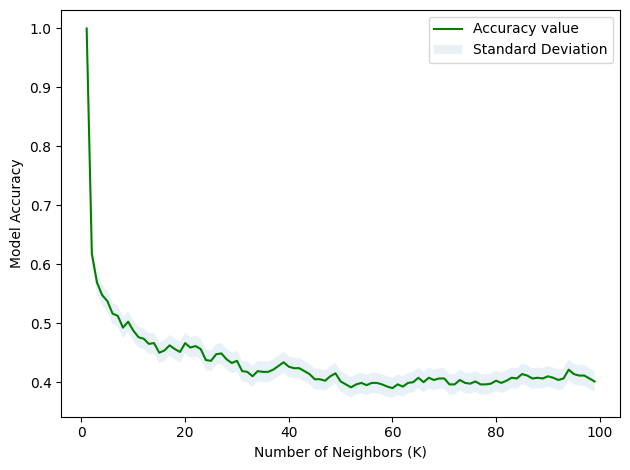

In [19]:
Ks =100
acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_train)
    acc[n-1] = accuracy_score(y_train, yhat)
    std_acc[n-1] = np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),acc,'g')
plt.fill_between(range(1,Ks),acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Ejercicio 4

¿Puedes justificar por qué el rendimiento del modelo en los datos de entrenamiento se deteriora a medida que aumenta el valor de k?

Cuando k es pequeño (por ejemplo, k = 1), el modelo es muy sensible a los puntos individuales del conjunto de datos. La predicción para cada punto se basa en su vecino más cercano, lo que puede generar fronteras de decisión muy específicas y flexibles. Esto provoca sobreajuste en los datos de entrenamiento: el modelo puede rendir muy bien sobre el conjunto de entrenamiento, incluso alcanzando un 100% de precisión. Sin embargo, puede generalizar mal a datos no vistos.

Cuando k es grande, el modelo empieza a tomar en cuenta a más vecinos al hacer las predicciones. Esto tiene dos consecuencias principales:

Suavizado de la frontera de decisión: La frontera de decisión se vuelve más suave, lo que significa que el modelo es menos sensible al ruido o fluctuaciones en los datos de entrenamiento.

Predicciones menos específicas: Con un k más grande, el modelo considera más vecinos y, por lo tanto, hace predicciones más generalizadas, lo que puede ocasionar que menos instancias sean clasificadas perfectamente.

Como resultado, el modelo se vuelve menos flexible y pierde la capacidad de memorizar los datos de entrenamiento (lo cual puede producir una precisión perfecta cuando k es pequeño).

### Ejercicio 5

Podemos ver que incluso con los valores óptimos, el modelo KNN no está funcionando tan bien en este conjunto de datos. ¿Puedes pensar en posibles razones para esto?

El bajo rendimiento del modelo puede deberse a múltiples razones:

El modelo KNN depende completamente del espacio de características original en el momento de la inferencia. Si las características no proporcionan límites claros entre las clases, el modelo KNN no puede compensarlo mediante optimización o transformación de características.

Cuando hay un gran número de características débilmente correlacionadas, aumenta la dimensionalidad, y la distancia entre puntos tiende a volverse más uniforme, lo que reduce el poder discriminativo de KNN.

El algoritmo trata a todas las características por igual al calcular distancias. Por lo tanto, las características débilmente correlacionadas pueden introducir ruido o variaciones irrelevantes en el espacio de características, dificultando que KNN encuentre vecinos realmente significativos.

Fin del cuadernillo